In [1]:
import pandas as pd
from sqlalchemy import create_engine 
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [2]:
#  Database file path
db_path = "Resources\project3.sqlite"

# Connecting to the SQLite database
engine = create_engine(f"sqlite:///{db_path}")
conn = engine.connect()

# Reading data from the database and loading in DataFrame
query = "select * from house_data"
housedata_df = pd.read_sql(query,conn)

# Close the connection
conn.close()

In [3]:
housedata_df.head()
# housedata_df.columns

,Id,State,Median Home Price,Median Home Size (in square feet),Median Household Income
0,1,Alabama,165200,1996,52035
1,2,Alaska,293400,1857,77790
2,3,Arizona,349300,1942,61529
3,4,Arkansas,145300,1865,49475
4,5,California,684800,1778,78672


#### States with highest and lowest Median House Price

In [4]:
# Sorting  DataFrame in descending order of Median Home Price 
house_price_sorted_d = housedata_df.sort_values("Median Home Price", ascending = False)
highest5_df = house_price_sorted_d[['State', 'Median Home Price','Median Household Income']].head()
highest5_df

,State,Median Home Price,Median Household Income
10,Hawaii,732000,83173
4,California,684800,78672
20,Massachusetts,510500,84385
46,Washington,504200,77006
5,Colorado,488600,75231


In [5]:
house_price_sorted_d.set_index("State")

,Id,Median Home Price,Median Home Size (in square feet),Median Household Income
State,,,,
Hawaii,11,732000,1229,83173
California,5,684800,1778,78672
Massachusetts,21,510500,1805,84385
Washington,47,504200,2025,77006
Colorado,6,488600,2243,75231
Utah,44,458900,2522,74197
Oregon,37,438100,1870,65667
Idaho,12,398900,2192,58915
New Jersey,30,397900,1724,85245


In [6]:
# Sorting DataFrame in acending order of Median Home Price 
house_price_sorted_a = housedata_df.sort_values("Median Home Price")
lowest5_df = house_price_sorted_a[['State', 'Median Home Price','Median Household Income']].head()
lowest5_df

,State,Median Home Price,Median Household Income
47,West Virginia,114600,48037
23,Mississippi,141900,46511
3,Arkansas,145300,49475
35,Oklahoma,146600,53840
14,Iowa,161700,61836


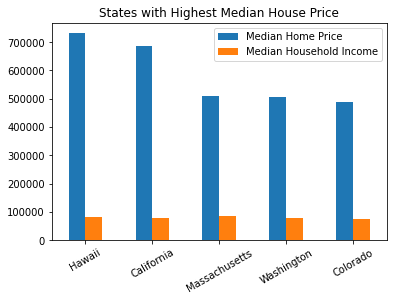

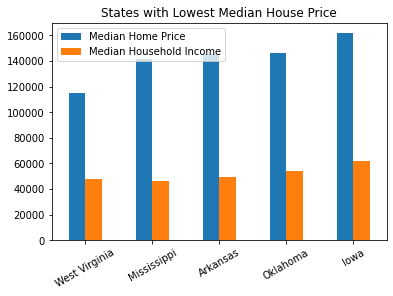

In [7]:
# Charts of States with Highest Median House Price and States with Lowest Median House Price"
a = highest5_df.plot(kind = "bar", title = "States with Highest Median House Price")
b = lowest5_df.plot(kind = "bar",title = "States with Lowest Median House Price" )
a.set_xticklabels(highest5_df["State"], rotation=30)
b.set_xticklabels(lowest5_df["State"], rotation=30)
plt.show()


In [8]:
# Sorting DataFrame in descending order of Median Income
median_income_sorted_d = housedata_df.sort_values("Median Household Income", ascending = False)
median_income_sorted_d.head()

,Id,State,Median Home Price,Median Home Size (in square feet),Median Household Income
19,20,Maryland,361900,1862,87063
29,30,New Jersey,397900,1724,85245
20,21,Massachusetts,510500,1805,84385
10,11,Hawaii,732000,1229,83173
6,7,Connecticut,318400,1942,79855


In [9]:
# Sorting DataFrame in descending order of Median Income
median_income_sorted_a = housedata_df.sort_values("Median Household Income")
median_income_sorted_a.head()

,Id,State,Median Home Price,Median Home Size (in square feet),Median Household Income
23,24,Mississippi,141900,2033,46511
47,48,West Virginia,114600,1789,48037
3,4,Arkansas,145300,1865,49475
17,18,Louisiana,189200,1923,50800
30,31,New Mexico,246000,1996,51243
